<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/simple_CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple CLIP**

In [1]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-vgk6eod9
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-vgk6eod9
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.7 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369500 sha256=45b045b26f794c49b764bb7cd6369486bc095dea58a2f920cf6d90ad9b1d80f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-2gfqb9l0/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.10
    Uninstalling wcwidth-0.2.10:
      Successfully uninstalled wcwidth-0.2.10


In [17]:
import os
import torch
import clip
import matplotlib.pyplot as plt
from PIL import Image
import requests

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Set Image Path and Load Image

In [3]:
PATH = "/content/drive/My Drive/candidates/test/Asset 1" #@param{type:'string'}
FORMAT = ".png" #@param{type:'string'}
# os.listdir(PATH)

## Load CLIP Model

In [10]:
# Load the CLIP model
model, preprocess = clip.load('ViT-B/32', device='cpu')

## Image and Text for Evaluation

In [11]:
# Load the image
image_path = str(PATH + FORMAT)
image = preprocess(Image.open(image_path)).unsqueeze(0).to('cpu')

In [12]:
text_prompt = "Describe your text prompt here."
text = clip.tokenize([text_prompt]).to('cpu')

## Calculate features

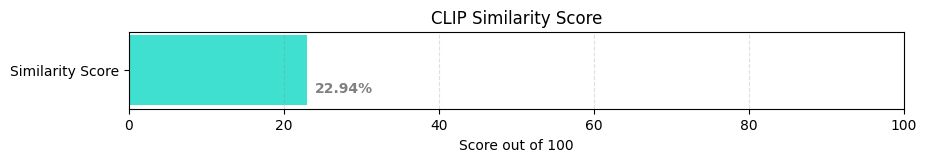

CLIP score (similarity) between the image and the text prompt: 0.22940385341644287


In [24]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    # Compute the cosine similarity between the features
    # Higher values indicate greater similarity between the text and image
    similarity = torch.nn.functional.cosine_similarity(text_features, image_features, dim=1)

    # Converting the similarity score to a percentage
    similarity_percentage = similarity * 100

    # Drawing a bar chart with specified figure size
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.barh(['Similarity Score'], [similarity_percentage], color='turquoise')
    ax.set_xlim(0, 100)
    ax.set_xlabel('Score out of 100')
    ax.set_title('CLIP Similarity Score')

    # Adding vertical dotted grid lines
    ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

    # Display the percentage on the bar
    for i in ax.patches:
        ax.text(i.get_width()+1, i.get_y()+0.15,
                str(round((i.get_width()), 2)) + '%',
                fontsize=10, fontweight='bold',
                color='grey')

    plt.show()

print(f"CLIP score (similarity) between the image and the text prompt: {similarity.item()}")